In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix



In [2]:
RANDOM_SEED = 2021
LABELS = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

# Step 1: Load the dataset
dataset = pd.read_csv("csv_result-ECG5000_TEST.csv")



In [3]:
# Step 2: Check the dataset
print("Columns in the dataset:", list(dataset.columns))
print("Any nulls in the dataset:", dataset.isnull().values.any())
print("Unique labels:", dataset['Unnamed: 141'].unique())



Columns in the dataset: ['id', 'att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17', 'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25', 'att26', 'att27', 'att28', 'att29', 'att30', 'att31', 'att32', 'att33', 'att34', 'att35', 'att36', 'att37', 'att38', 'att39', 'att40', 'att41', 'att42', 'att43', 'att44', 'att45', 'att46', 'att47', 'att48', 'att49', 'att50', 'att51', 'att52', 'att53', 'att54', 'att55', 'att56', 'att57', 'att58', 'att59', 'att60', 'att61', 'att62', 'att63', 'att64', 'att65', 'att66', 'att67', 'att68', 'att69', 'att70', 'att71', 'att72', 'att73', 'att74', 'att75', 'att76', 'att77', 'att78', 'att79', 'att80', 'att81', 'att82', 'att83', 'att84', 'att85', 'att86', 'att87', 'att88', 'att89', 'att90', 'att91', 'att92', 'att93', 'att94', 'att95', 'att96', 'att97', 'att98', 'att99', 'att100', 'att101', 'att102', 'att103', 'att104', 'att105', 'att106', 'att107', 'att108

In [4]:
dataset.describe()

,id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,Unnamed: 141
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2250.500000,-0.273962,-1.660351,-2.497708,-3.121793,-3.166346,-2.862646,-2.271681,-1.797901,-1.407947,...,0.073410,-0.060409,-0.273551,-0.502636,-0.753850,-0.824197,-0.630282,-0.474437,-0.694958,1.527778
std,1299.182435,1.153257,1.448446,1.384922,1.300375,1.101844,0.906330,0.735420,0.628203,0.642411,...,1.410561,1.652410,1.899489,2.063698,2.087378,2.050563,1.848085,1.817460,1.411511,0.761301
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.259295,-5.330194,-4.782240,-4.311288,-4.071361,...,-4.167040,-4.557576,-4.530488,-4.563270,-4.911417,-4.880460,-5.496107,-5.880890,-6.092227,1.000000
25%,1125.750000,-1.018202,-2.710514,-3.675967,-4.221921,-4.006748,-3.472986,-2.779941,-2.164166,-1.773173,...,-1.104062,-1.598281,-2.157220,-2.743237,-3.014821,-2.856324,-2.131719,-1.635179,-1.577515,1.000000
50%,2250.500000,-0.303240,-1.672456,-2.592071,-3.397653,-3.460329,-2.938500,-2.282163,-1.748535,-1.420713,...,0.676028,0.732593,0.608052,0.335153,-0.025628,-0.180293,-0.191248,-0.144524,-0.551293,1.000000
75%,3375.250000,0.485655,-0.684776,-1.519119,-2.240458,-2.530796,-2.397532,-1.822741,-1.483616,-1.059521,...,1.173172,1.239463,1.267172,1.237470,1.037941,0.947254,0.948825,1.002692,0.277078,2.000000
max,4500.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,3.007606,2.854680,2.912134,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,5.000000


In [12]:
# Step 3: Prepare the data
raw_data = dataset.values
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

# Step 4: Split the dataset into training and testing sets (80% train, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=RANDOM_SEED
)

# Step 5: Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Step 6: Create a mask for normal and abnormal classes
normal_train_data = train_data[train_labels == 1]
abnormal_train_data = train_data[train_labels != 1]



Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0076 - loss: 0.7669 - val_accuracy: 0.0000e+00 - val_loss: 1.0627
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0051 - loss: 0.7437 - val_accuracy: 0.0011 - val_loss: 1.0174
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0065 - loss: 0.6141 - val_accuracy: 0.0022 - val_loss: 0.9509
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0081 - loss: 0.5300 - val_accuracy: 0.0022 - val_loss: 0.9099
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0132 - loss: 0.5098 - val_accuracy: 0.0056 - val_loss: 0.8800
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0234 - loss: 0.4771 - val_accuracy: 0.0144 - val_loss: 0.8667
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0308 - loss: 0.4585 - val_accuracy: 0.0133 - val_loss: 0.8585
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0261 - loss: 0.4535 - val_accuracy: 0.0144 - val_

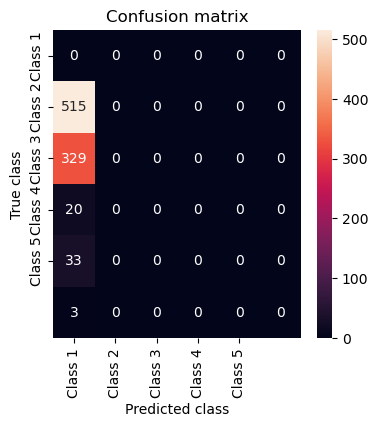

In [13]:
# Step 7: Build the Autoencoder model
input_dim = normal_train_data.shape[1]
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2)
hidden_dim_2 = 4  

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh")(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

# Step 8: Train the model
nb_epoch = 50
batch_size = 64

history = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1).history

# Step 9: Make predictions and evaluate
test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

# Step 10: Set a threshold for anomaly detection
threshold_fixed = 52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] = pred_y

# Step 11: Confusion matrix
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
